Лабораторная работа №2.
Задание:
    Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия.
    Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно 
    заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Модель Вольтерра-Лотки описывает взаимодействие двух видов типа "хищник-жертва", а также показывает, что численность данных видов изменяется по гармоническому закону. Существует такая стационарная точка, вокруг которой происходят колебания. Таким образом, за критерий устойчивости возьмем обеспечение минимальной разницы между данными видами.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize


class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()


def main():
    biome = Biome(tmax=10)
    biome.run(2, 5, 2, 2)
    biome.plot()
    biome.plot_cycle()

if __name__ == "__main__":
    main()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [5]:
def compare(k):
    n = 1.5
    alpha, beta, gamma, delta = k
    x0, y0 = 1, 1
    x_s = gamma / delta
    y_s = alpha / beta
    c = beta * y0 + delta * x0 - alpha * np.log(np.abs(y0)) - gamma * np.log(np.abs(x0))

    max_x = lambda x: beta * y_s + delta * x - alpha * np.log(np.abs(y_s)) - gamma * np.log(np.abs(x)) - c
    max_y = lambda y: beta * y + delta * x_s - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_s)) - c

    min_x = fsolve(max_x, 0.001)
    min_y = fsolve(max_y, 0.001)

    return np.abs(min_y / min_x - n)

 final_simplex: (array([[1.10592568, 0.95363371, 0.86107642, 1.07405292],
       [1.10585669, 0.95361727, 0.86110418, 1.07414987],
       [1.10585785, 0.95364643, 0.8610825 , 1.0741291 ],
       [1.10589261, 0.95360127, 0.86111579, 1.07408518],
       [1.10592912, 0.95366472, 0.86108778, 1.07407326]]), array([8.37598832e-06, 1.22900077e-05, 2.04570725e-05, 2.74394722e-05,
       3.20824011e-05]))
           fun: 8.37598832115205e-06
       message: 'Optimization terminated successfully.'
          nfev: 109
           nit: 59
        status: 0
       success: True
             x: array([1.10592568, 0.95363371, 0.86107642, 1.07405292])
[8.37598832e-06]


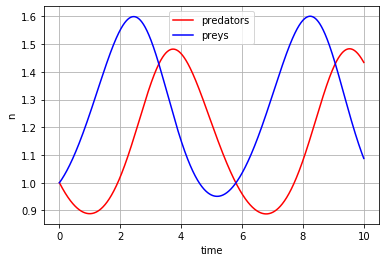

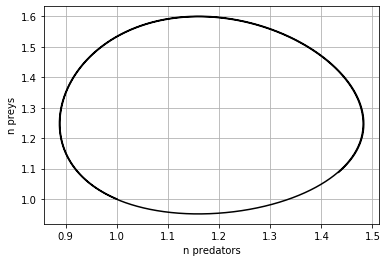

In [6]:
if __name__ == '__main__':
    result = minimize(compare, [1, 1, 1, 1], method='Nelder-Mead')
    print(result)
    print(compare(result.x))

    biome = Biome()
    biome.run(*result.x)
    biome.plot()
    biome.plot_cycle()